**ENVIRONMENT SETUP**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import spacy
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('averaged_perceptron_tagger')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## DATA PREPROCESSING

**Data Loading**

In [ ]:
# Load the train.csv file
train_data = pd.read_csv('train.csv')

# Load the train.csv file
test_data = pd.read_csv('test.csv')

# Create a new DataFrame with combined 'text' column
combined_data = pd.DataFrame({'text': pd.concat([train_data['text'], test_data['text']], axis=0)})

# Reset the index of the combined_text DataFrame
combined_data.reset_index(drop=True, inplace=True)

# Display the combined text
print(combined_data)

print('Total number of entries in the train dataset are:', len(train_data))
print('Total number of entries in the test dataset are:', len(test_data))

                                                    text
0      Our Deeds are the Reason of this #earthquake M...
1                 Forest fire near La Ronge Sask. Canada
2      All residents asked to 'shelter in place' are ...
3      13,000 people receive #wildfires evacuation or...
4      Just got sent this photo from Ruby #Alaska as ...
...                                                  ...
10871  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872  Storm in RI worse than last hurricane. My city...
10873  Green Line derailment in Chicago http://t.co/U...
10874  MEG issues Hazardous Weather Outlook (HWO) htt...
10875  #CityofCalgary has activated its Municipal Eme...

[10876 rows x 1 columns]
Total number of entries in the train dataset are: 7613
Total number of entries in the test dataset are: 3263


**Preliminary Analysis**

In [ ]:
# Display the first few rows of the dataset
print(train_data.head())

# Check the shape of the dataset
print("Dataset shape:", train_data.shape)

# Check for missing values
print("Missing values:\n", train_data.isnull().sum())

# Check the distribution of target values
print("Target value counts:\n", train_data['target'].value_counts())

# Check unique values in the 'keyword' column
print("Unique keywords:", train_data['keyword'].unique())

# Check unique values in the 'location' column
print("Unique locations:", train_data['location'].unique())

# Display the first few rows of the dataset
print(combined_data.head())

# Check the shape of the dataset
print("Dataset shape:", combined_data.shape)

# Check for missing values
print("Missing values:\n", combined_data.isnull().sum())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Dataset shape: (7613, 5)
Missing values:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Target value counts:
 0    4342
1    3271
Name: target, dtype: int64
Unique keywords: [nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazin

**Sentence Tokenization**

In [ ]:
# Select the 'text' column for sentence tokenization
text_data = combined_data['text']

# Tokenize each text sentence
tokenized_sentences = []
for text in text_data:
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences.append(sentences)

# Create a new column for tokenized sentences in the DataFrame
combined_data['tokenized_sentences'] = tokenized_sentences

# Display the DataFrame with tokenized sentences
print(combined_data['tokenized_sentences'])

0        [Our Deeds are the Reason of this #earthquake ...
1                [Forest fire near La Ronge Sask., Canada]
2        [All residents asked to 'shelter in place' are...
3        [13,000 people receive #wildfires evacuation o...
4        [Just got sent this photo from Ruby #Alaska as...
                               ...                        
10871    [EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FAST...
10872    [Storm in RI worse than last hurricane., My ci...
10873    [Green Line derailment in Chicago http://t.co/...
10874    [MEG issues Hazardous Weather Outlook (HWO) ht...
10875    [#CityofCalgary has activated its Municipal Em...
Name: tokenized_sentences, Length: 10876, dtype: object


**Remove URL links**

In [ ]:
# Select the 'cleaned_words' column for URL link removal
cleaned_words_data = combined_data['tokenized_sentences']

# Remove URL links from each list of cleaned words
cleaned_words_without_links = []
for cleaned_words in cleaned_words_data:
    cleaned_sentence = []
    for word in cleaned_words:
        cleaned_word = re.sub(r'http\S+|www\S+', '', word)
        cleaned_sentence.append(cleaned_word)
    cleaned_words_without_links.append(cleaned_sentence)

# Create a new column for cleaned words without links in the DataFrame
combined_data['cleaned_words_without_links'] = cleaned_words_without_links

# Display the DataFrame with cleaned words without links
print(combined_data['cleaned_words_without_links'])

0        [Our Deeds are the Reason of this #earthquake ...
1                [Forest fire near La Ronge Sask., Canada]
2        [All residents asked to 'shelter in place' are...
3        [13,000 people receive #wildfires evacuation o...
4        [Just got sent this photo from Ruby #Alaska as...
                               ...                        
10871    [EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FAST...
10872    [Storm in RI worse than last hurricane., My ci...
10873                  [Green Line derailment in Chicago ]
10874        [MEG issues Hazardous Weather Outlook (HWO) ]
10875    [#CityofCalgary has activated its Municipal Em...
Name: cleaned_words_without_links, Length: 10876, dtype: object


**Remove symbols and special characters**

In [ ]:
# Select the 'cleaned_words_without_links' column for symbol and special character removal
cleaned_words_data = combined_data['cleaned_words_without_links']

# Remove symbols and special characters from each list of cleaned words
cleaned_words_without_symbols = []
for cleaned_words in cleaned_words_data:
    cleaned_sentence = []
    for word in cleaned_words:
        cleaned_word = re.sub(r'[^a-zA-Z0-9\s]', '', word)
        cleaned_sentence.append(cleaned_word)
    cleaned_words_without_symbols.append(cleaned_sentence)

# Create a new column for cleaned words without symbols in the DataFrame
combined_data['cleaned_words_without_symbols'] = cleaned_words_without_symbols

# Display the DataFrame with cleaned words without symbols
print(combined_data['cleaned_words_without_symbols'])

0        [Our Deeds are the Reason of this earthquake M...
1                 [Forest fire near La Ronge Sask, Canada]
2        [All residents asked to shelter in place are b...
3        [13000 people receive wildfires evacuation ord...
4        [Just got sent this photo from Ruby Alaska as ...
                               ...                        
10871    [EARTHQUAKE SAFETY LOS ANGELES  SAFETY FASTENE...
10872    [Storm in RI worse than last hurricane, My cit...
10873                  [Green Line derailment in Chicago ]
10874          [MEG issues Hazardous Weather Outlook HWO ]
10875    [CityofCalgary has activated its Municipal Eme...
Name: cleaned_words_without_symbols, Length: 10876, dtype: object


**Word Tokenization**

In [ ]:
# Select the 'tokenized_sentences' column for word tokenization
sentences_data = combined_data['cleaned_words_without_symbols']

# Tokenize each sentence into words
tokenized_words = []
for sentences in sentences_data:
    words = []
    for sentence in sentences:
        sentence_words = nltk.word_tokenize(sentence)
        words.extend(sentence_words)
    tokenized_words.append(words)

# Create a new column for tokenized words in the DataFrame
combined_data['tokenized_words'] = tokenized_words

# Display the DataFrame with tokenized words
print(combined_data['tokenized_words'])

0        [Our, Deeds, are, the, Reason, of, this, earth...
1            [Forest, fire, near, La, Ronge, Sask, Canada]
2        [All, residents, asked, to, shelter, in, place...
3        [13000, people, receive, wildfires, evacuation...
4        [Just, got, sent, this, photo, from, Ruby, Ala...
                               ...                        
10871    [EARTHQUAKE, SAFETY, LOS, ANGELES, SAFETY, FAS...
10872    [Storm, in, RI, worse, than, last, hurricane, ...
10873               [Green, Line, derailment, in, Chicago]
10874      [MEG, issues, Hazardous, Weather, Outlook, HWO]
10875    [CityofCalgary, has, activated, its, Municipal...
Name: tokenized_words, Length: 10876, dtype: object


**Stopword Removal**

In [ ]:
# Select the 'tokenized_words' column for stopword removal
tokenized_words_data = combined_data['tokenized_words']

# Define the list of stopwords
stopwords_list = set(stopwords.words('english'))

# Remove stopwords from each list of tokenized words
filtered_words = []
for tokenized_words in tokenized_words_data:
    filtered_sentence = [word for word in tokenized_words if word.lower() not in stopwords_list]
    filtered_words.append(filtered_sentence)

# Create a new column for filtered words in the DataFrame
combined_data['filtered_words'] = filtered_words

# Display the DataFrame with filtered words
print(combined_data['filtered_words'])

0        [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
1            [Forest, fire, near, La, Ronge, Sask, Canada]
2        [residents, asked, shelter, place, notified, o...
3        [13000, people, receive, wildfires, evacuation...
4        [got, sent, photo, Ruby, Alaska, smoke, wildfi...
                               ...                        
10871    [EARTHQUAKE, SAFETY, LOS, ANGELES, SAFETY, FAS...
10872    [Storm, RI, worse, last, hurricane, cityamp3ot...
10873                   [Green, Line, derailment, Chicago]
10874      [MEG, issues, Hazardous, Weather, Outlook, HWO]
10875    [CityofCalgary, activated, Municipal, Emergenc...
Name: filtered_words, Length: 10876, dtype: object


**Removal of Tags**

In [ ]:
# Select the 'filtered_words' column for tag removal
filtered_words_data = combined_data['filtered_words']

# Remove HTML tags from each list of filtered words
cleaned_words = []
for filtered_words in filtered_words_data:
    cleaned_sentence = []
    for word in filtered_words:
        cleaned_word = re.sub(r'<.*?>', '', word)
        cleaned_sentence.append(cleaned_word)
    cleaned_words.append(cleaned_sentence)

# Create a new column for cleaned words in the DataFrame
combined_data['cleaned_words'] = cleaned_words

# Display the DataFrame with cleaned words
print(combined_data['cleaned_words'])

0        [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
1            [Forest, fire, near, La, Ronge, Sask, Canada]
2        [residents, asked, shelter, place, notified, o...
3        [13000, people, receive, wildfires, evacuation...
4        [got, sent, photo, Ruby, Alaska, smoke, wildfi...
                               ...                        
10871    [EARTHQUAKE, SAFETY, LOS, ANGELES, SAFETY, FAS...
10872    [Storm, RI, worse, last, hurricane, cityamp3ot...
10873                   [Green, Line, derailment, Chicago]
10874      [MEG, issues, Hazardous, Weather, Outlook, HWO]
10875    [CityofCalgary, activated, Municipal, Emergenc...
Name: cleaned_words, Length: 10876, dtype: object


**Delimiter Removal**

In [ ]:
# Select the 'cleaned_words' column for delimiter removal
cleaned_words_data = combined_data['cleaned_words']

# Define the delimiters to remove
delimiters = [',', '.', ';', ':', '!', '?', '#', '@', '[', ']']

# Remove delimiters from each list of cleaned words
final_words = []
for cleaned_words in cleaned_words_data:
    final_sentence = []
    for word in cleaned_words:
        for delimiter in delimiters:
            word = word.replace(delimiter, '')
        final_sentence.append(word.lower())  # Convert word to lowercase
    final_words.append(final_sentence)

# Create a new column for final words in the DataFrame
combined_data['final_words'] = final_words

# Display the DataFrame with final words
print(combined_data['final_words'])

0        [deeds, reason, earthquake, may, allah, forgiv...
1            [forest, fire, near, la, ronge, sask, canada]
2        [residents, asked, shelter, place, notified, o...
3        [13000, people, receive, wildfires, evacuation...
4        [got, sent, photo, ruby, alaska, smoke, wildfi...
                               ...                        
10871    [earthquake, safety, los, angeles, safety, fas...
10872    [storm, ri, worse, last, hurricane, cityamp3ot...
10873                   [green, line, derailment, chicago]
10874      [meg, issues, hazardous, weather, outlook, hwo]
10875    [cityofcalgary, activated, municipal, emergenc...
Name: final_words, Length: 10876, dtype: object


**Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer

# Select the 'final_words' column for lemmatization
final_words_data = combined_data['final_words']

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each list of final words
lemmatized_words = []
for final_words in final_words_data:
    lemmatized_sentence = [lemmatizer.lemmatize(word) for word in final_words]
    lemmatized_words.append(lemmatized_sentence)

# Create a new column for lemmatized words in the DataFrame
combined_data['lemmatized_words'] = lemmatized_words

# Display the DataFrame with lemmatized words
print(combined_data['lemmatized_words'])

0        [deed, reason, earthquake, may, allah, forgive...
1            [forest, fire, near, la, ronge, sask, canada]
2        [resident, asked, shelter, place, notified, of...
3        [13000, people, receive, wildfire, evacuation,...
4        [got, sent, photo, ruby, alaska, smoke, wildfi...
                               ...                        
10871    [earthquake, safety, los, angeles, safety, fas...
10872    [storm, ri, worse, last, hurricane, cityamp3ot...
10873                   [green, line, derailment, chicago]
10874       [meg, issue, hazardous, weather, outlook, hwo]
10875    [cityofcalgary, activated, municipal, emergenc...
Name: lemmatized_words, Length: 10876, dtype: object


**Splitting**

In [ ]:
# Split the combined_data back into train and test datasets
train = combined_data[:len(train_data)].copy()
train['target'] = train_data['target'].copy()
test = combined_data[len(train_data):].copy()

# Reset the index of the train_data and test_data DataFrames
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Display the train and test datasets
print("Train dataset:")
print(train)
print("\nTest dataset:")
print(test)

# Check the number of entries in the train and test datasets
print('\nTotal number of entries in the train dataset:', len(train))
print('Total number of entries in the test dataset:', len(test))

Train dataset:
                                                   text  \
0     Our Deeds are the Reason of this #earthquake M...   
1                Forest fire near La Ronge Sask. Canada   
2     All residents asked to 'shelter in place' are ...   
3     13,000 people receive #wildfires evacuation or...   
4     Just got sent this photo from Ruby #Alaska as ...   
...                                                 ...   
7608  Two giant cranes holding a bridge collapse int...   
7609  @aria_ahrary @TheTawniest The out of control w...   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   
7611  Police investigating after an e-bike collided ...   
7612  The Latest: More Homes Razed by Northern Calif...   

                                    tokenized_sentences  \
0     [Our Deeds are the Reason of this #earthquake ...   
1             [Forest fire near La Ronge Sask., Canada]   
2     [All residents asked to 'shelter in place' are...   
3     [13,000 people receive #wildfires 

In [ ]:
train.head(3)

,text,tokenized_sentences,cleaned_words_without_links,cleaned_words_without_symbols,tokenized_words,filtered_words,cleaned_words,final_words,lemmatized_words,stemmed_words,target
0,Our Deeds are the Reason of this #earthquake M...,[Our Deeds are the Reason of this #earthquake ...,[Our Deeds are the Reason of this #earthquake ...,[Our Deeds are the Reason of this earthquake M...,"[Our, Deeds, are, the, Reason, of, this, earth...","[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[Deeds, Reason, earthquake, May, ALLAH, Forgiv...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquake, may, allah, forgive...","[deed, reason, earthquak, may, allah, forgiv, u]",1
1,Forest fire near La Ronge Sask. Canada,"[Forest fire near La Ronge Sask., Canada]","[Forest fire near La Ronge Sask., Canada]","[Forest fire near La Ronge Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, Canada]","[Forest, fire, near, La, Ronge, Sask, Canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]",1
2,All residents asked to 'shelter in place' are ...,[All residents asked to 'shelter in place' are...,[All residents asked to 'shelter in place' are...,[All residents asked to shelter in place are b...,"[All, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[residents, asked, shelter, place, notified, o...","[residents, asked, shelter, place, notified, o...","[resident, asked, shelter, place, notified, of...","[resid, ask, shelter, place, notifi, offic, ev...",1


In [ ]:
test.head(3)

,text,tokenized_sentences,cleaned_words_without_links,cleaned_words_without_symbols,tokenized_words,filtered_words,cleaned_words,final_words,lemmatized_words,stemmed_words
0,Just happened a terrible car crash,[Just happened a terrible car crash],[Just happened a terrible car crash],[Just happened a terrible car crash],"[Just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]","[happened, terrible, car, crash]","[happened, terrible, car, crash]","[happened, terrible, car, crash]","[happen, terribl, car, crash]"
1,"Heard about #earthquake is different cities, s...","[Heard about #earthquake is different cities, ...","[Heard about #earthquake is different cities, ...",[Heard about earthquake is different cities st...,"[Heard, about, earthquake, is, different, citi...","[Heard, earthquake, different, cities, stay, s...","[Heard, earthquake, different, cities, stay, s...","[heard, earthquake, different, cities, stay, s...","[heard, earthquake, different, city, stay, saf...","[heard, earthquak, differ, citi, stay, safe, e..."
2,"there is a forest fire at spot pond, geese are...","[there is a forest fire at spot pond, geese ar...","[there is a forest fire at spot pond, geese ar...",[there is a forest fire at spot pond geese are...,"[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, geese, fleeing, acr...","[forest, fire, spot, pond, geese, fleeing, acr...","[forest, fire, spot, pond, geese, fleeing, acr...","[forest, fire, spot, pond, goose, fleeing, acr...","[forest, fire, spot, pond, goos, flee, across,..."


In [ ]:
train.drop(['tokenized_sentences', 'cleaned_words_without_links', 'cleaned_words_without_symbols', 'tokenized_words', 'filtered_words', 'cleaned_words', 'final_words'],axis=1, inplace=True)

In [ ]:
test.drop(['tokenized_sentences', 'cleaned_words_without_links', 'cleaned_words_without_symbols', 'tokenized_words', 'filtered_words', 'cleaned_words', 'final_words'],axis=1, inplace=True)

In [ ]:
train['text'] = train['lemmatized_words'].apply(lambda x: " ".join(x))

In [ ]:
train

,text,lemmatized_words,stemmed_words,target
0,deed reason earthquake may allah forgive u,"[deed, reason, earthquake, may, allah, forgive...","[deed, reason, earthquak, may, allah, forgiv, u]",1
1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]",1
2,resident asked shelter place notified officer ...,"[resident, asked, shelter, place, notified, of...","[resid, ask, shelter, place, notifi, offic, ev...",1
3,13000 people receive wildfire evacuation order...,"[13000, people, receive, wildfire, evacuation,...","[13000, peopl, receiv, wildfir, evacu, order, ...",1
4,got sent photo ruby alaska smoke wildfire pour...,"[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...",1
...,...,...,...,...
7608,two giant crane holding bridge collapse nearby...,"[two, giant, crane, holding, bridge, collapse,...","[two, giant, crane, hold, bridg, collaps, near...",1
7609,ariaahrary thetawniest control wild fire calif...,"[ariaahrary, thetawniest, control, wild, fire,...","[ariaahrari, thetawniest, control, wild, fire,...",1
7610,m194 0104 utc5km volcano hawaii,"[m194, 0104, utc5km, volcano, hawaii]","[m194, 0104, utc5km, volcano, hawaii]",1
7611,police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ...","[polic, investig, ebik, collid, car, littl, po...",1


In [ ]:
test['text'] = test['lemmatized_words'].apply(lambda x: " ".join(x))

In [ ]:
test

,text,lemmatized_words,stemmed_words
0,happened terrible car crash,"[happened, terrible, car, crash]","[happen, terribl, car, crash]"
1,heard earthquake different city stay safe ever...,"[heard, earthquake, different, city, stay, saf...","[heard, earthquak, differ, citi, stay, safe, e..."
2,forest fire spot pond goose fleeing across str...,"[forest, fire, spot, pond, goose, fleeing, acr...","[forest, fire, spot, pond, goos, flee, across,..."
3,apocalypse lighting spokane wildfire,"[apocalypse, lighting, spokane, wildfire]","[apocalyps, light, spokan, wildfir]"
4,typhoon soudelor kill 28 china taiwan,"[typhoon, soudelor, kill, 28, china, taiwan]","[typhoon, soudelor, kill, 28, china, taiwan]"
...,...,...,...
3258,earthquake safety los angeles safety fastener ...,"[earthquake, safety, los, angeles, safety, fas...","[earthquak, safeti, lo, angel, safeti, fasten,..."
3259,storm ri worse last hurricane cityamp3others h...,"[storm, ri, worse, last, hurricane, cityamp3ot...","[storm, ri, wors, last, hurrican, cityamp3oth,..."
3260,green line derailment chicago,"[green, line, derailment, chicago]","[green, line, derail, chicago]"
3261,meg issue hazardous weather outlook hwo,"[meg, issue, hazardous, weather, outlook, hwo]","[meg, issu, hazard, weather, outlook, hwo]"


# FEATURE ENGINEERING

## Vocabulary creation

In [ ]:
# function to create vocab
from collections import Counter
def create_vocab(df):
    vocab = Counter()
    for i in range(df.shape[0]):
        vocab.update(df.text[i].split())
    return(vocab)

In [ ]:
# concatenate training and testing datasets
master=pd.concat((train,test)).reset_index(drop=True)

# call vocabulary creation function on master dataset
vocab = create_vocab(master)

# lets check the no. of words in the vocabulary
len(vocab)

20579

In [ ]:
# lets check the most common 50 words in the vocabulary
vocab.most_common(50)

[('fire', 511),
 ('like', 493),
 ('amp', 434),
 ('im', 431),
 ('get', 381),
 ('u', 348),
 ('new', 328),
 ('via', 324),
 ('one', 293),
 ('news', 283),
 ('people', 282),
 ('dont', 282),
 ('video', 235),
 ('2', 233),
 ('emergency', 228),
 ('time', 226),
 ('disaster', 220),
 ('year', 211),
 ('would', 206),
 ('body', 202),
 ('police', 197),
 ('building', 194),
 ('day', 185),
 ('life', 184),
 ('go', 183),
 ('say', 182),
 ('home', 181),
 ('storm', 181),
 ('still', 180),
 ('family', 180),
 ('attack', 177),
 ('got', 175),
 ('suicide', 174),
 ('crash', 172),
 ('first', 168),
 ('burning', 168),
 ('know', 165),
 ('rt', 163),
 ('bomb', 163),
 ('flood', 162),
 ('look', 160),
 ('back', 160),
 ('world', 160),
 ('california', 158),
 ('see', 157),
 ('make', 155),
 ('car', 154),
 ('death', 154),
 ('train', 154),
 ('love', 150)]

In [ ]:
# create the final vocab by considering words with more than one occurence
final_vocab = []
min_occur = 2
for k,v in vocab.items():
    if v >= min_occur:
        final_vocab.append(k)

In [ ]:
len(final_vocab)

7637

Now lets apply this vocab on our train and test datasets, we will keep only those words in training and testing datasets which appear in the vocabulary

In [ ]:
# function to filter the dataset, keep only words which are present in the vocab
def filter(tweet):
    sentence = ""
    for word in tweet.split():  
        if word in final_vocab:
            sentence = sentence + word + ' '
    return(sentence)

In [ ]:
# apply filter function on the train and test datasets
train['text'] = train['text'].apply(lambda s : filter(s))
test ['text'] = test ['text'].apply(lambda s : filter(s))

In [ ]:
# lets take a look at the update training dataset
train.text.head()

0          deed reason earthquake may allah forgive u 
1                          forest fire near la canada 
2    resident asked shelter place officer evacuatio...
3    13000 people receive wildfire evacuation order...
4    got sent photo ruby alaska smoke wildfire school 
Name: text, dtype: object

We have cleaned the datasets and have also created vocab, now lets perform n-gram analysis

## N-gram Analysis
n-gram is basically set of occurring words within given window so when

n=1 it is Unigram

n=2 it is bigram

n=3 it is trigram and so on

In [ ]:
test

,text,lemmatized_words
0,happened terrible car crash,"[happened, terrible, car, crash]"
1,heard earthquake different city stay safe ever...,"[heard, earthquake, different, city, stay, saf..."
2,forest fire spot pond fleeing across street save,"[forest, fire, spot, pond, goose, fleeing, acr..."
3,apocalypse lighting spokane wildfire,"[apocalypse, lighting, spokane, wildfire]"
4,typhoon soudelor kill 28 china taiwan,"[typhoon, soudelor, kill, 28, china, taiwan]"
...,...,...
3258,earthquake safety los angeles safety,"[earthquake, safety, los, angeles, safety, fas..."
3259,storm ri worse last hurricane cityamp3others h...,"[storm, ri, worse, last, hurricane, cityamp3ot..."
3260,green line derailment chicago,"[green, line, derailment, chicago]"
3261,meg issue hazardous weather outlook hwo,"[meg, issue, hazardous, weather, outlook, hwo]"


In [ ]:
# lets create seperate datasets from real and fake tweets
real = train[train.target==1].reset_index()
fake = train[train.target==0].reset_index()

In [ ]:
# function to create top 100 n-grams
def get_ngrams(data,n):
    all_words = []
    for i in range(len(data)):
        temp = data["text"][i].split()
        for word in temp:
            all_words.append(word)

    tokenized = all_words
    esBigrams = ngrams(tokenized, n)

    esBigram_wordlist = nltk.FreqDist(esBigrams)
    top100 = esBigram_wordlist.most_common(100)
    top100 = dict(top100)
    df_ngrams = pd.DataFrame(sorted(top100.items(), key=lambda x: x[1])[::-1])
    return df_ngrams

In [ ]:
# function to visualize the top 100 n-grams in real and fake disaster tweets
def draw_barplots(real,fake,title):
    plt.figure(figsize = (40,80),dpi=100)

    plt.subplot(1,2,1)
    sns.barplot(y=real[0].values[:100], x=real[1].values[:100], color='green')
    plt.title("Top 100" + title + "in Real Tweets",fontsize=15)
    
    plt.subplot(1,2,2)
    sns.barplot(y=fake[0].values[:100], x=fake[1].values[:100],color='red')
    plt.title("Top 100" + title + "in Fake Tweets",fontsize=15)

### Unigram

In [ ]:
# lets create top 100 unigrams
real_unigrams = get_ngrams(real,1)
fake_unigrams = get_ngrams(fake,1)


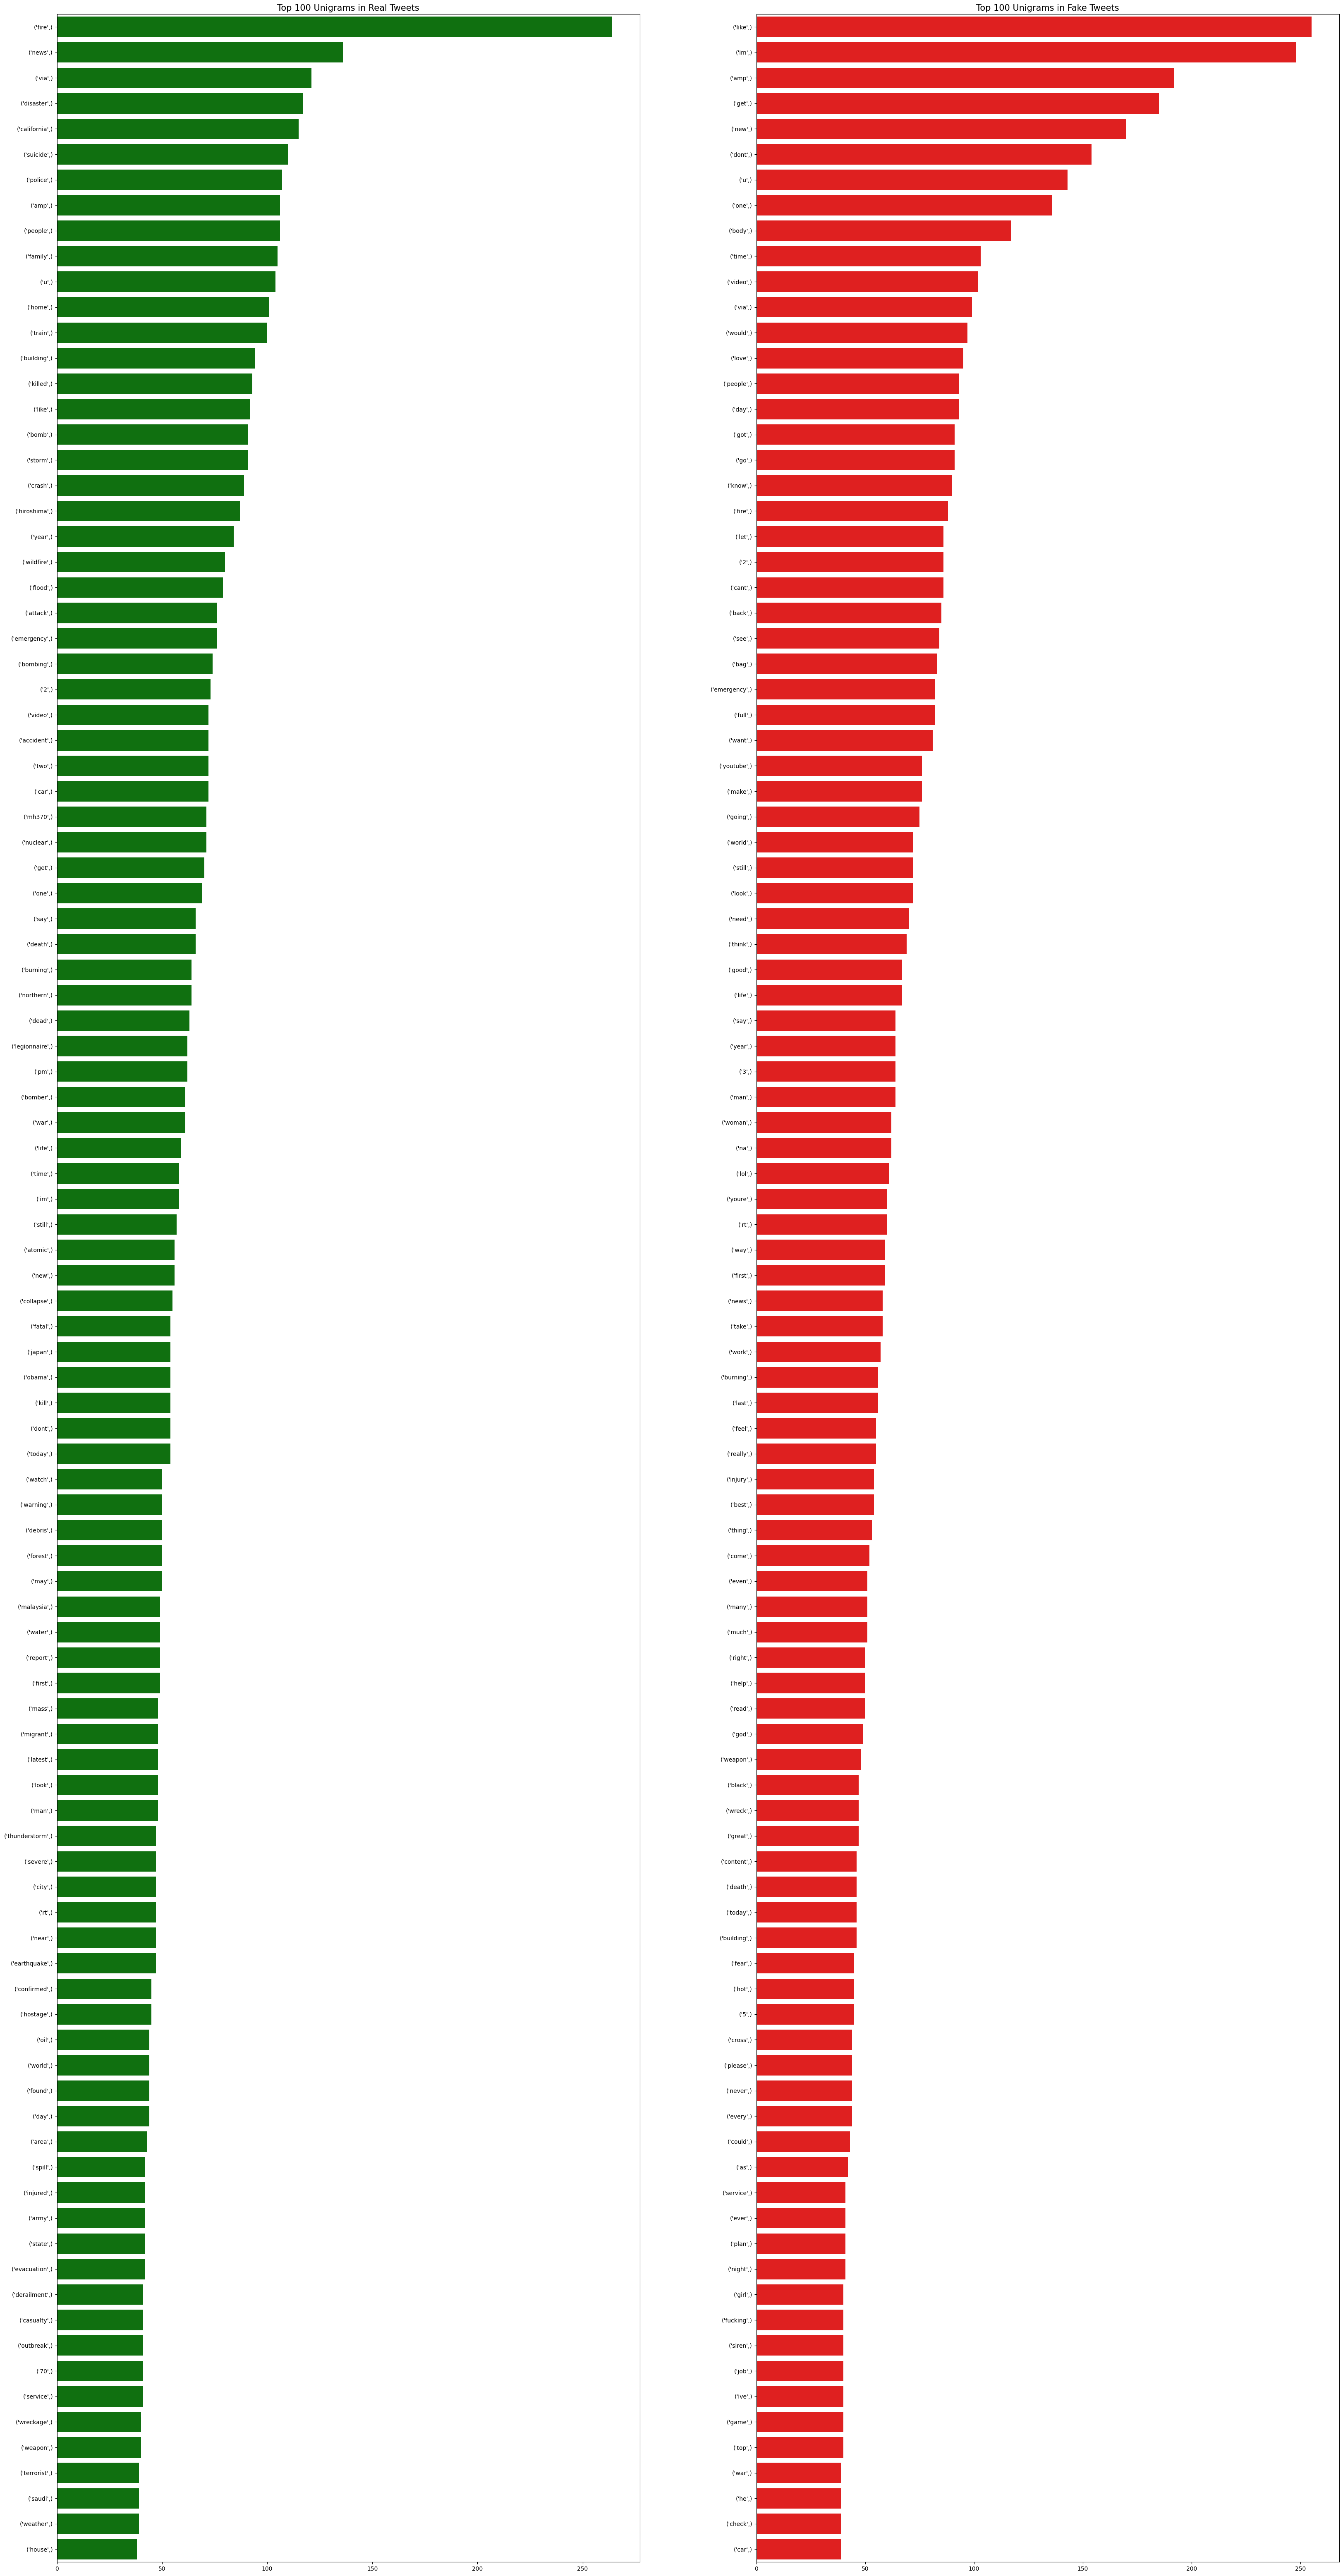

In [ ]:
# lets visualize top 100 unigrams
draw_barplots(real_unigrams,fake_unigrams," Unigrams ")

### Bigrams

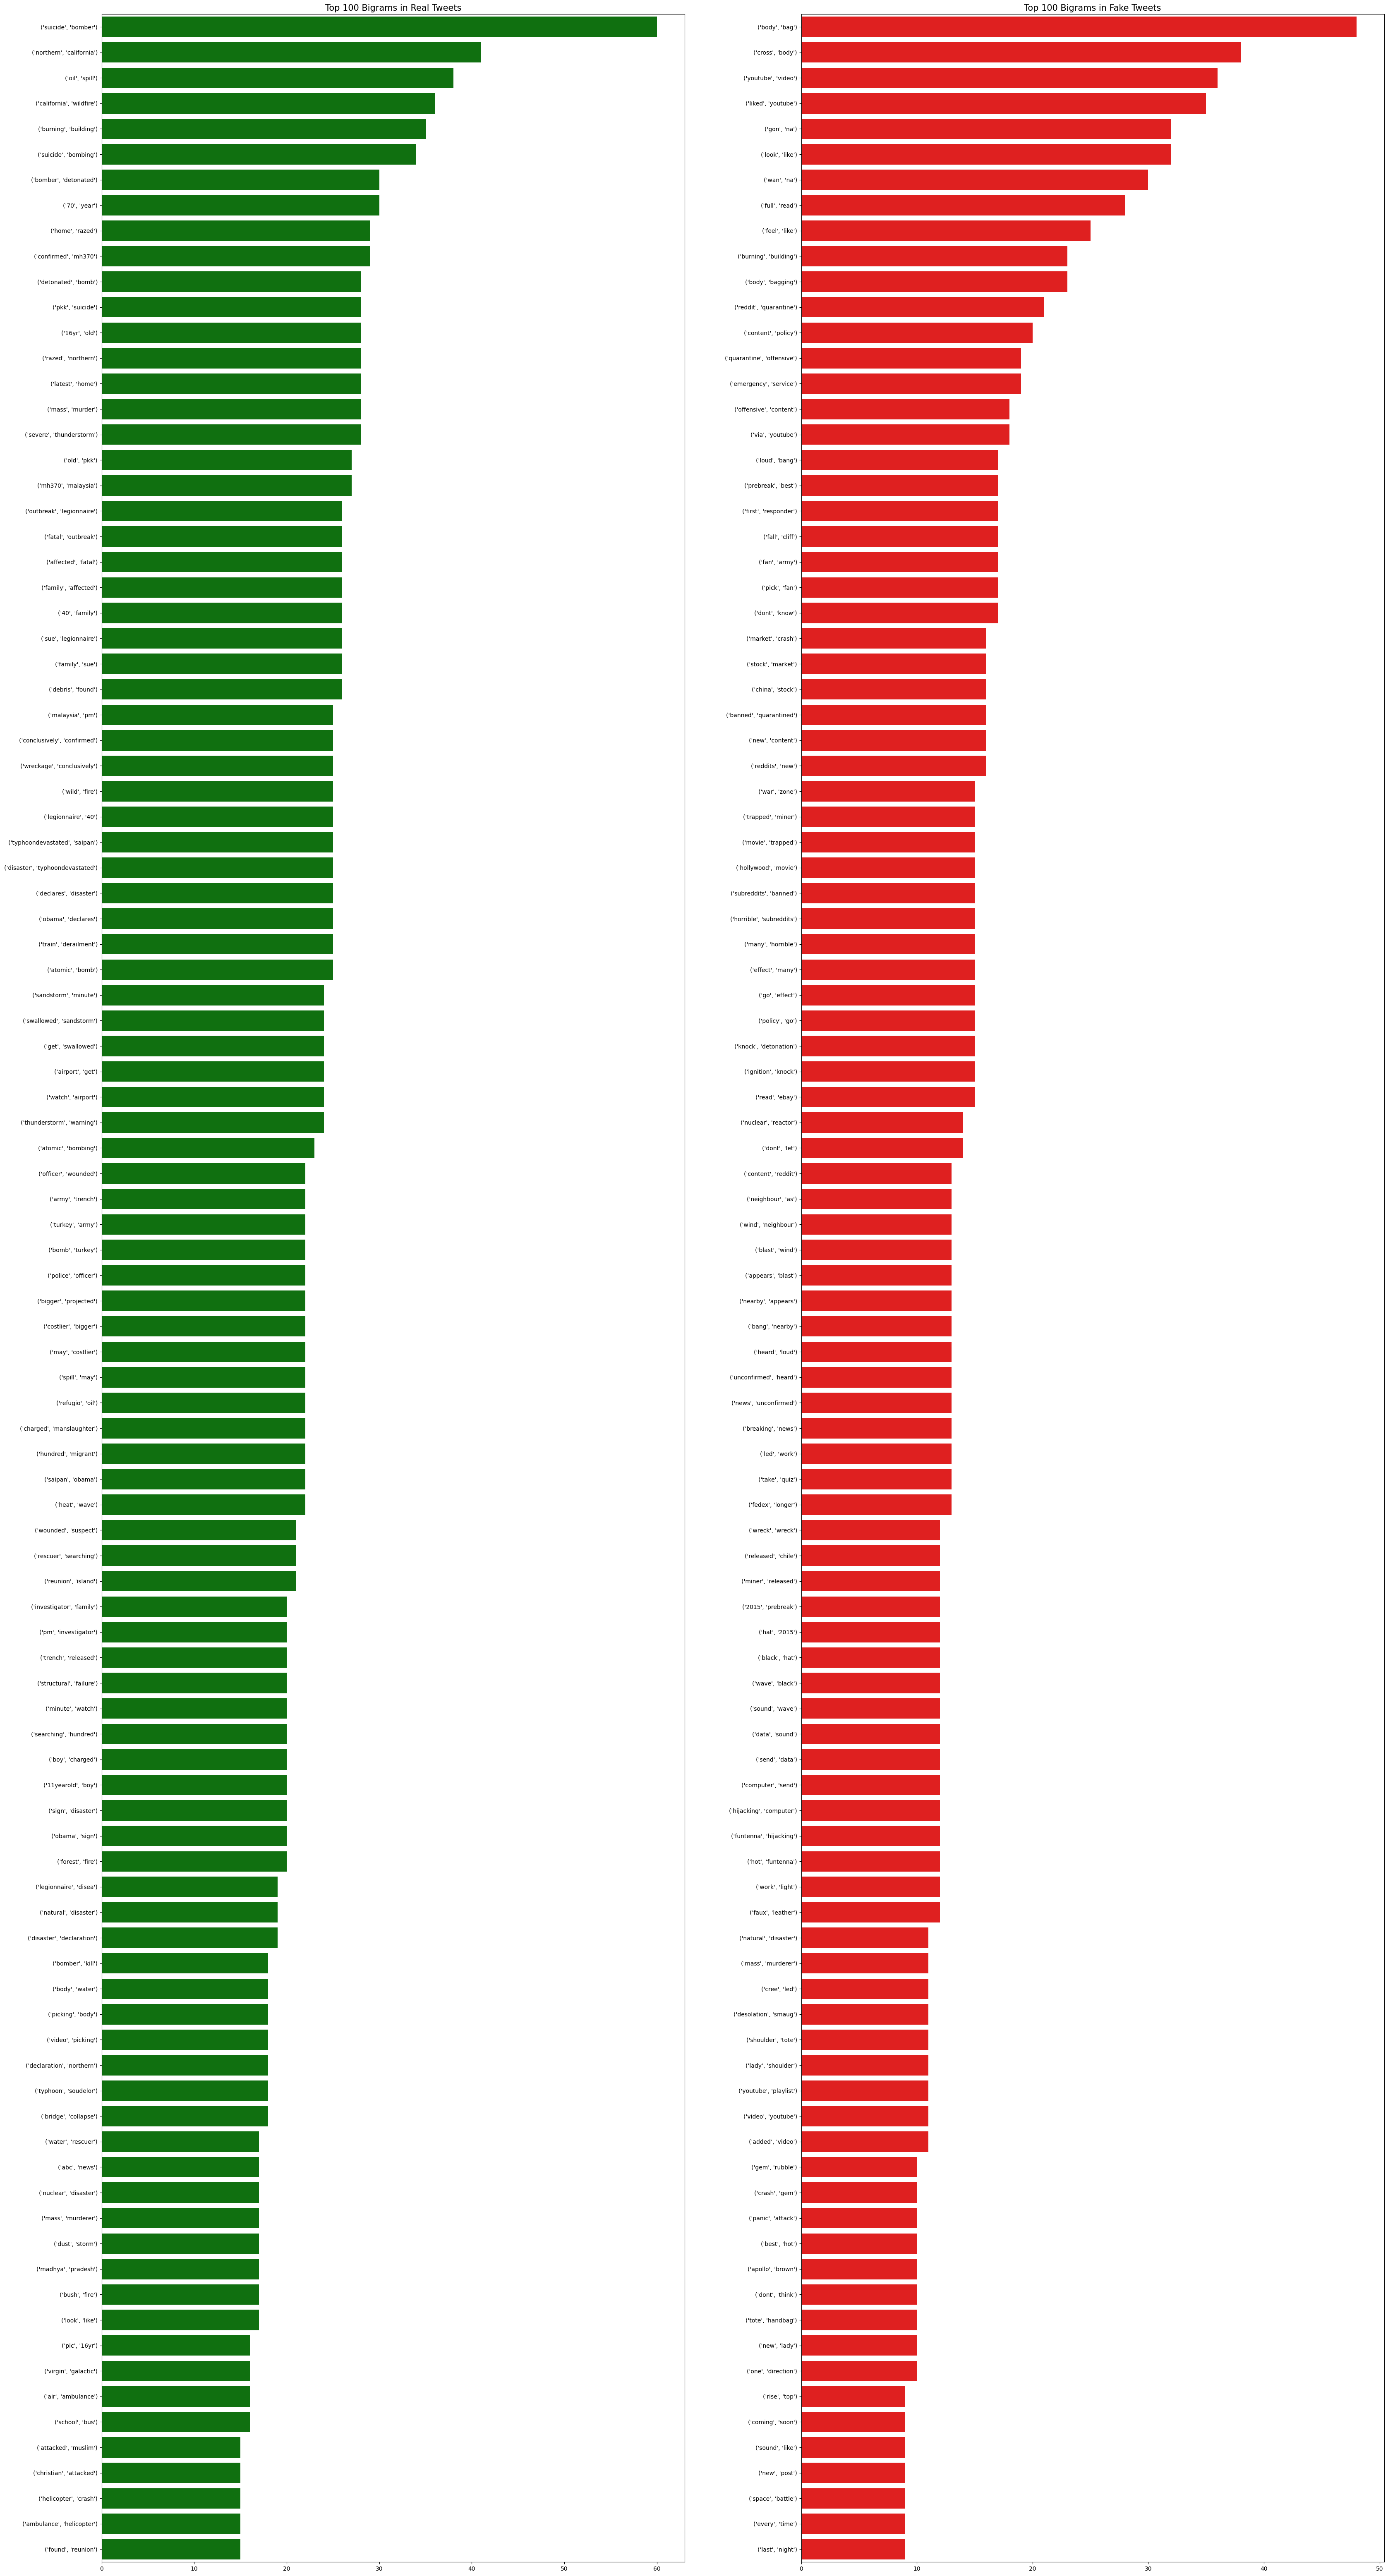

In [ ]:
# lets create top 100 bigrams
real_bigrams = get_ngrams(real,2)
fake_bigrams = get_ngrams(fake,2)

# lets visualize top 100 bigrams

draw_barplots(real_bigrams,fake_bigrams," Bigrams ")

### Trigrams

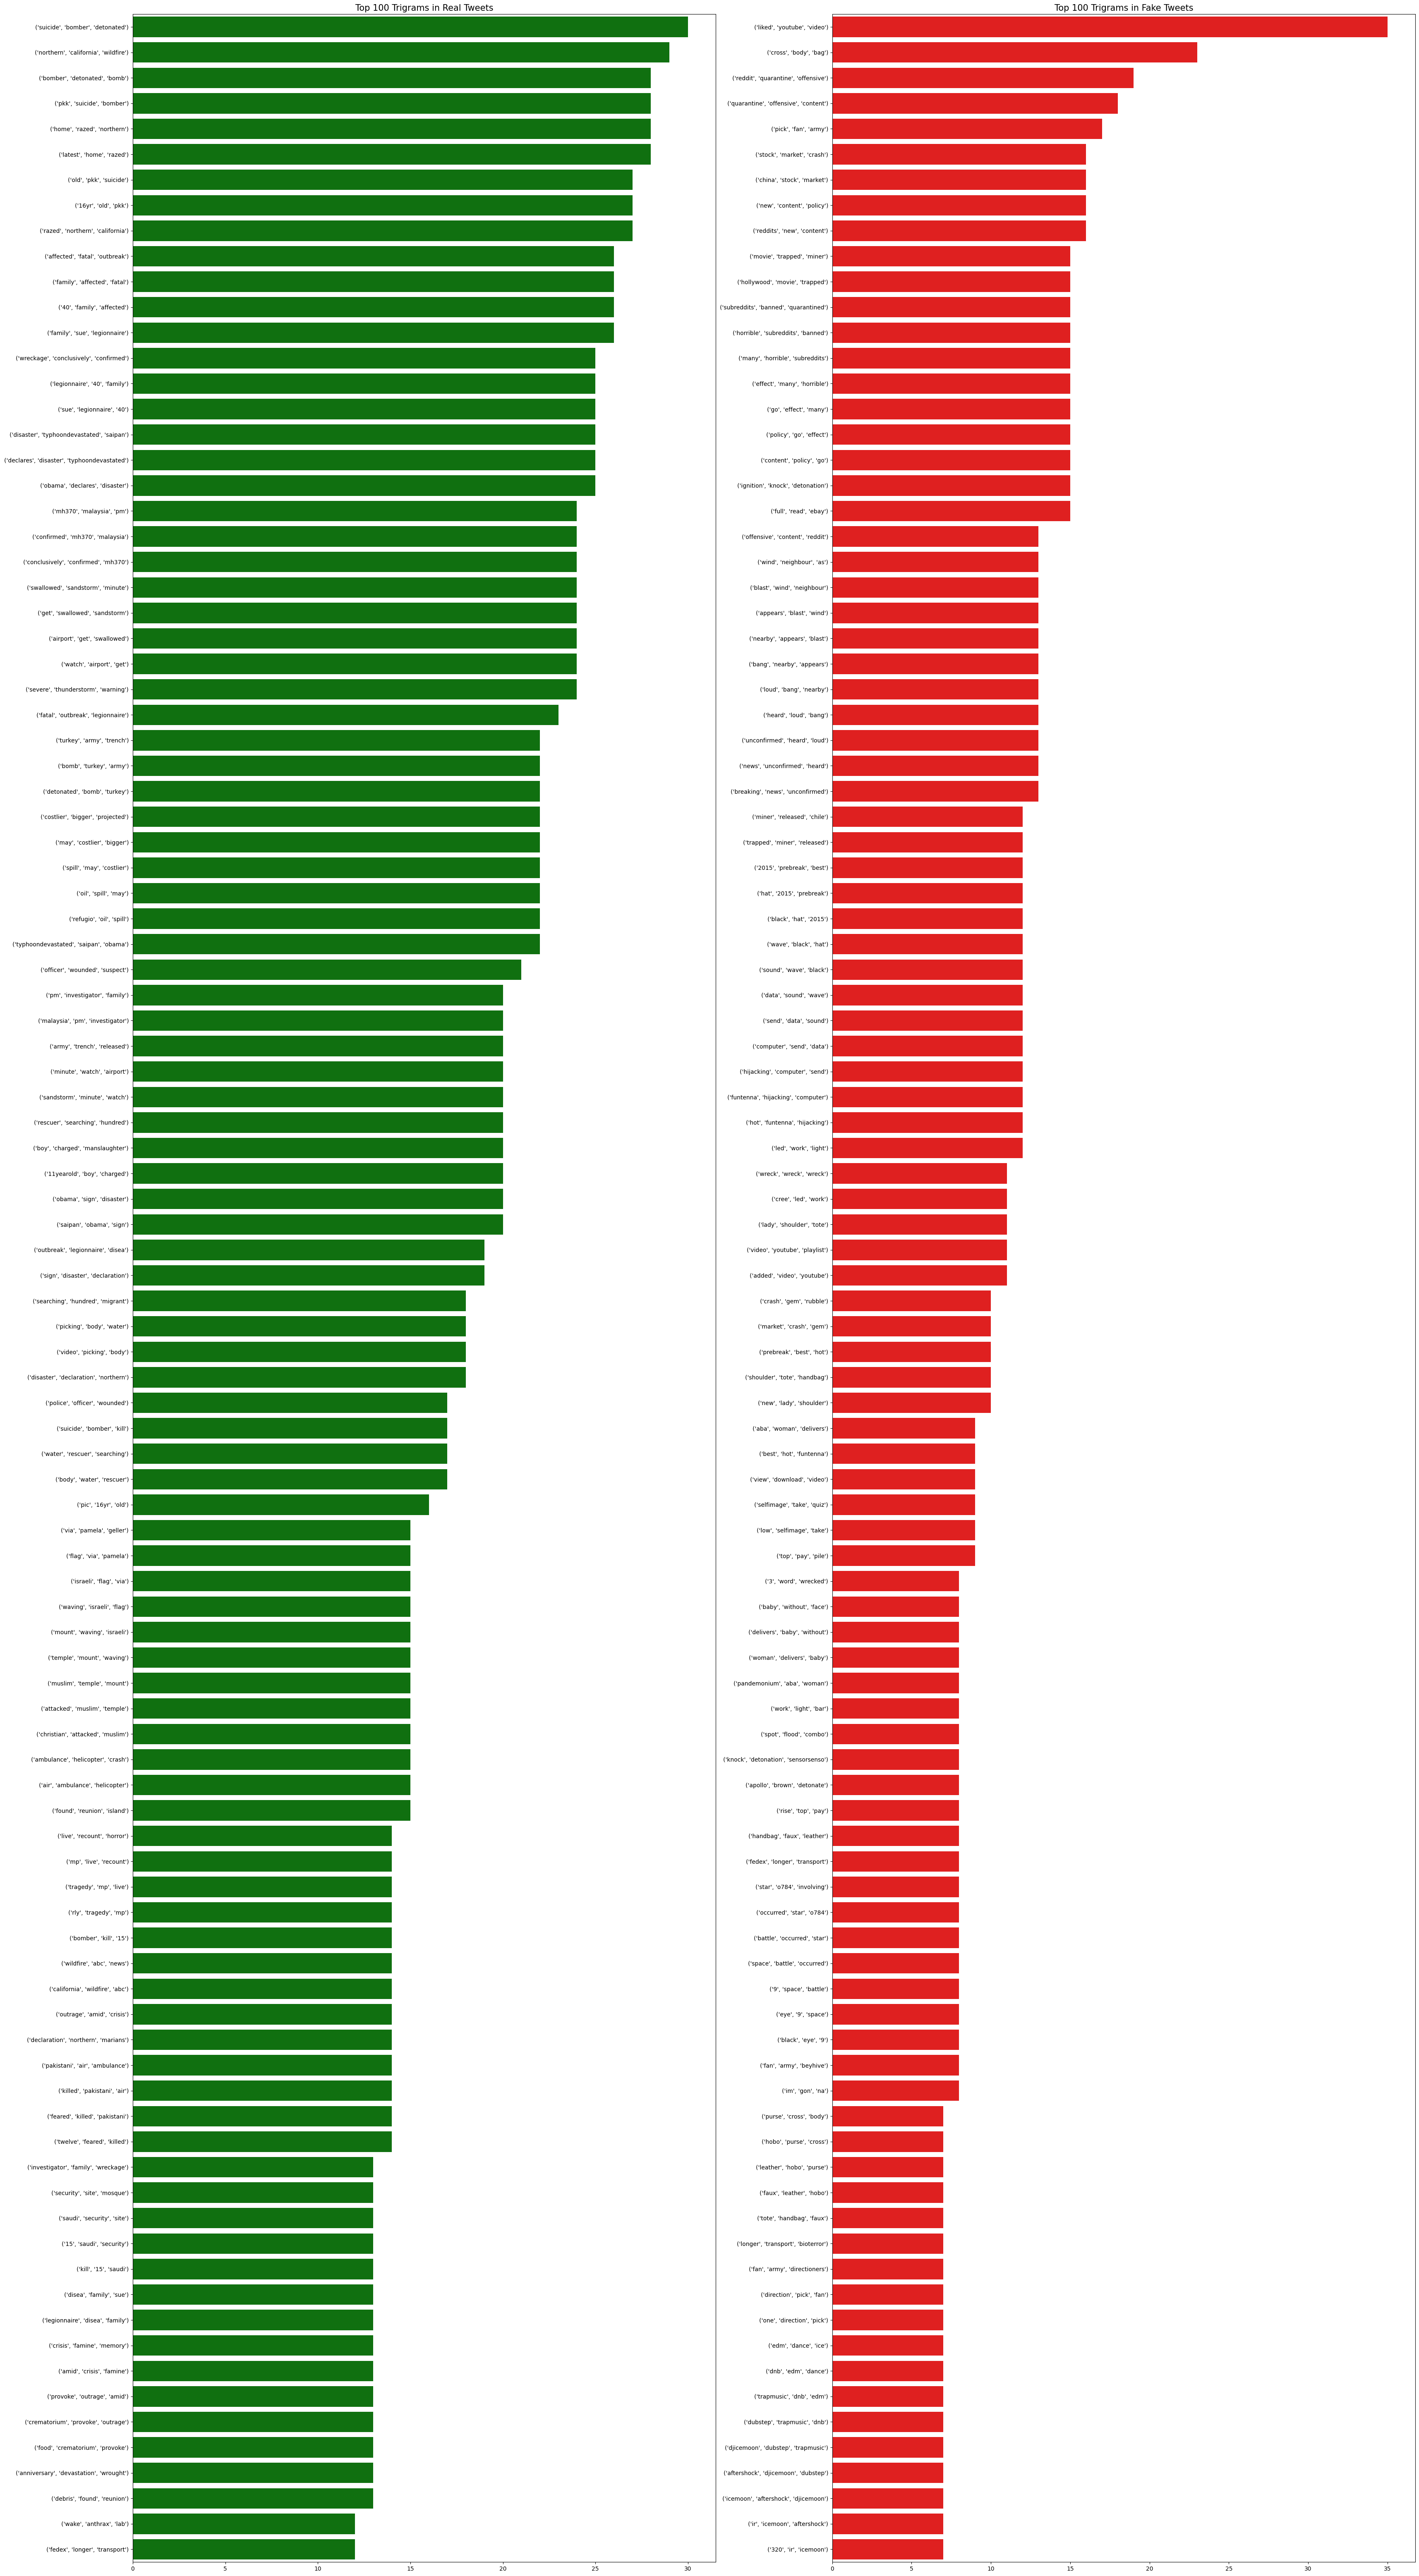

In [ ]:
# lets create top 100 trigrams
real_trigrams = get_ngrams(real,3)
fake_trigrams = get_ngrams(fake,3)

# lets visualize top 100 trigrams
draw_barplots(real_trigrams,fake_trigrams," Trigrams ")

## POS Tagger

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

Noun (NN)- Joseph, London, table, cat, teacher, pen, city  
Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is  
Adjective(JJ)- beautiful, happy, sad, young, fun, three  
Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow  
Preposition (IN)- at, on, in, from, with, near, between, about, under  
Conjunction (CC)- and, or, but, because, so, yet, unless, since, if  
Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this  
Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!  

In [ ]:
train['lemmatized_words']

0       [deed, reason, earthquake, may, allah, forgive...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, asked, shelter, place, notified, of...
3       [13000, people, receive, wildfire, evacuation,...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, holding, bridge, collapse,...
7609    [ariaahrary, thetawniest, control, wild, fire,...
7610                [m194, 0104, utc5km, volcano, hawaii]
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, home, razed, northern, california, wi...
Name: lemmatized_words, Length: 7613, dtype: object

In [ ]:
train['pos_tag'] = train['lemmatized_words'].apply(lambda x: nltk.pos_tag(x))

In [ ]:
train

,text,lemmatized_words,target,pos_tag
0,deed reason earthquake may allah forgive u,"[deed, reason, earthquake, may, allah, forgive...",1,"[(deed, NN), (reason, NN), (earthquake, NN), (..."
1,forest fire near la canada,"[forest, fire, near, la, ronge, sask, canada]",1,"[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,resident asked shelter place officer evacuatio...,"[resident, asked, shelter, place, notified, of...",1,"[(resident, NN), (asked, VBD), (shelter, JJ), ..."
3,13000 people receive wildfire evacuation order...,"[13000, people, receive, wildfire, evacuation,...",1,"[(13000, CD), (people, NNS), (receive, VBP), (..."
4,got sent photo ruby alaska smoke wildfire school,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1,"[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."
...,...,...,...,...
7608,two giant crane holding bridge collapse nearby...,"[two, giant, crane, holding, bridge, collapse,...",1,"[(two, CD), (giant, JJ), (crane, NN), (holding..."
7609,ariaahrary thetawniest control wild fire calif...,"[ariaahrary, thetawniest, control, wild, fire,...",1,"[(ariaahrary, JJ), (thetawniest, JJS), (contro..."
7610,m194 0104 utc5km volcano hawaii,"[m194, 0104, utc5km, volcano, hawaii]",1,"[(m194, NN), (0104, CD), (utc5km, JJ), (volcan..."
7611,police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ...",1,"[(police, NNS), (investigating, VBG), (ebike, ..."


## N-Gram

In [ ]:
train['n_grams1'] = train['lemmatized_words'].apply(lambda x: [' '.join(grams) for grams in ngrams(x, 2)])
print(train['n_grams1'])

0       [deed reason, reason earthquake, earthquake ma...
1       [forest fire, fire near, near la, la ronge, ro...
2       [resident asked, asked shelter, shelter place,...
3       [13000 people, people receive, receive wildfir...
4       [got sent, sent photo, photo ruby, ruby alaska...
                              ...                        
7608    [two giant, giant crane, crane holding, holdin...
7609    [ariaahrary thetawniest, thetawniest control, ...
7610    [m194 0104, 0104 utc5km, utc5km volcano, volca...
7611    [police investigating, investigating ebike, eb...
7612    [latest home, home razed, razed northern, nort...
Name: n_grams1, Length: 7613, dtype: object


## Bag of words

In [ ]:
word_count = {}

for tokens in train['lemmatized_words']:
    for word in tokens:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1

print(f'Bag of Words: \n{word_count}')


Bag of Words: 
{'deed': 2, 'reason': 31, 'earthquake': 53, 'may': 88, 'allah': 9, 'forgive': 2, 'u': 247, 'forest': 66, 'fire': 352, 'near': 54, 'la': 29, 'ronge': 1, 'sask': 1, 'canada': 13, 'resident': 8, 'asked': 9, 'shelter': 6, 'place': 31, 'notified': 1, 'officer': 37, 'evacuation': 52, 'order': 35, 'expected': 15, '13000': 4, 'people': 199, 'receive': 2, 'wildfire': 83, 'california': 121, 'got': 123, 'sent': 13, 'photo': 65, 'ruby': 1, 'alaska': 8, 'smoke': 49, 'pours': 1, 'school': 70, 'rockyfire': 4, 'update': 48, 'hwy': 9, '20': 28, 'closed': 20, 'direction': 15, 'due': 31, 'lake': 16, 'county': 38, 'cafire': 2, 'flood': 113, 'disaster': 156, 'heavy': 20, 'rain': 52, 'cause': 61, 'flash': 21, 'flooding': 50, 'street': 32, 'manitou': 1, 'colorado': 16, 'spring': 18, 'area': 50, 'im': 306, 'top': 56, 'hill': 12, 'see': 112, 'wood': 6, 'there': 45, 'emergency': 158, 'happening': 13, 'building': 140, 'across': 20, 'afraid': 5, 'tornado': 38, 'coming': 52, 'three': 29, 'died': 28,

## Named Entity Recognition

NER - Named Entity Recognition is the process of extracting proper nouns or proper noun phrases. For example, in the sentence 'Robert is interested in Amazon', the entities 'Robert' (Name) and 'Amazon' (Organization) are selected.

In [ ]:
sp = spacy.load('en_core_web_sm')

In [ ]:
# Iterate over the elements in the 'text' column
for text in train_data['text'][:5]:
    # Process each text with Spacy
    doc = sp(text)

    print(f'Named Entity Recognition using SpaCy for text: \n\n{text} =>\n')
    for ent in doc.ents:
        print(ent.text, '-', ent.label_)
    print('\n')


Named Entity Recognition using SpaCy for text: 

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all =>

May ALLAH Forgive - ORG


Named Entity Recognition using SpaCy for text: 

Forest fire near La Ronge Sask. Canada =>

La Ronge Sask - FAC
Canada - GPE


Named Entity Recognition using SpaCy for text: 

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected =>



Named Entity Recognition using SpaCy for text: 

13,000 people receive #wildfires evacuation orders in California  =>

13,000 - CARDINAL
# - CARDINAL
California - GPE


Named Entity Recognition using SpaCy for text: 

Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  =>

Ruby - GPE
Alaska - GPE
# - CARDINAL




## Sentiment Analysis

Sentimental analysis plays a significant role in determining the polarity of a review or a comment. It is used to know whether the person is talking about something in a positive way or a negative way. It can be classified broadly into positive, negative, and neutral. For example, on a tourism website, a person leaves a remark stating, “There are beautiful tourist spots in Switzerland. “The word ‘beautiful’ is positive as it describes Switzerland as pretty.

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
train['text'][0]

'deed reason earthquake may allah forgive u '

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

for text in train['text'][:10]:
    polarity_scores = sia.polarity_scores(text)
    print(f"Sentiment Analysis using NLTK: \n{text} => {polarity_scores}\n")


Sentiment Analysis using NLTK: 
deed reason earthquake may allah forgive u  => {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.2732}

Sentiment Analysis using NLTK: 
forest fire near la canada  => {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.34}

Sentiment Analysis using NLTK: 
resident asked shelter place officer evacuation shelter place order expected  => {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentiment Analysis using NLTK: 
13000 people receive wildfire evacuation order california  => {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentiment Analysis using NLTK: 
got sent photo ruby alaska smoke wildfire school  => {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentiment Analysis using NLTK: 
rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire  => {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.34}

Sentiment Analysis using NLTK: 
flood disaster heavy rain cause flash flooding street colora

# TRAINING MODEL


* CountVectorizer:  
CountVectorizer converts text documents into a matrix of token counts. It represents each document as a vector, where each element in the vector corresponds to the count of a specific word (or token) in the document. It does not consider the importance or weight of the words, only their occurrence frequency. The resulting matrix is often referred to as a "term-document matrix" or "bag of words."
*TfidfVectorizer:  
TfidfVectorizer stands for "Term Frequency-Inverse Document Frequency Vectorizer." It also converts text documents into a matrix, but it takes into account the relative importance of words in a document and across multiple documents. It assigns higher weights to words that appear frequently in a document but less frequently in other documents, considering them to be more informative. The weight is calculated based on the term frequency (TF) and inverse document frequency (IDF). This representation is useful for capturing the discriminative power of words in a document corpus.

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
x = train['text'].values
y = train['target'].values

### CountVectorizer

In [ ]:
vectorizer1 = CountVectorizer()
X_train = vectorizer1.fit_transform(x)
X_test = vectorizer1.transform(test['text'])

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [ ]:
accuracy = {'BOW':[]}

In [ ]:
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['BOW'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[747 127]
 [183 466]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       874
           1       0.79      0.72      0.75       649

    accuracy                           0.80      1523
   macro avg       0.79      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

0.7964543663821405


In [ ]:
nb = MultinomialNB()
nb.fit(X_temp, y_temp)
y_predict_nb = nb.predict(X_test)
a=(nb.score(X_test, y_test))
accuracy['BOW'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_nb))
print(metrics.classification_report(y_test, y_predict_nb))
print(metrics.accuracy_score(y_test, y_predict_nb))

[[752 122]
 [180 469]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       874
           1       0.79      0.72      0.76       649

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

0.8017071569271176


In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_temp, y_temp)
y_predict_svm = svm.predict(X_test)
a=(svm.score(X_test, y_test))
accuracy['BOW'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_svm))
print(metrics.classification_report(y_test, y_predict_svm))
print(metrics.accuracy_score(y_test, y_predict_svm))

[[723 151]
 [205 444]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       874
           1       0.75      0.68      0.71       649

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.77      0.76      1523

0.7662508207485227


In [ ]:
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['BOW'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[803  71]
 [365 284]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       874
           1       0.80      0.44      0.57       649

    accuracy                           0.71      1523
   macro avg       0.74      0.68      0.68      1523
weighted avg       0.74      0.71      0.69      1523

0.7137229152987524


In [ ]:
model = ['LR','NB', 'SVC', 'KN']
data = {'model':model,'accuracy':accuracy['BOW']}
compare_models = pd.DataFrame(data)
compare_models.sort_values(by='accuracy', ascending=False)

,model,accuracy
1,NB,0.801707
0,LR,0.796454
2,SVC,0.766251
3,KN,0.713723


## TF-IDF

In [ ]:
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [ ]:

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer_ex = TfidfVectorizer()
text_list = list(train['text'])
text_list_ex = list(train['text'][:10])

tfidf = tfidf_vectorizer.fit_transform(text_list)
tfidf_ex = tfidf_vectorizer_ex.fit_transform(text_list_ex)

tfidf_feature_names = tfidf_vectorizer_ex.get_feature_names_out()

print('Term Frequency - Inverse Document Frequency of Document')
df = pd.DataFrame(tfidf_ex.toarray(), columns = tfidf_feature_names)
df.style.set_caption("Term Frequency - Inverse Document Frequency of Document")
df.style.applymap(color)

Term Frequency - Inverse Document Frequency of Document


,13000,20,across,afraid,alaska,allah,area,asked,building,cafire,california,canada,cause,closed,colorado,coming,county,deed,direction,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,got,happening,heavy,hill,hwy,im,la,lake,may,near,officer,order,people,photo,place,rain,reason,receive,resident,rockyfire,ruby,school,see,sent,shelter,smoke,spring,street,there,top,tornado,update,wildfire,wood
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.468646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348546,0.000000,0.000000,0.000000,0.468646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.468646,0.000000,0.000000,0.468646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.204120,0.274454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274454,0.233311,0.000000,0.000000,0.548908,0.000000,0.000000,0.000000,0.274454,0.000000,0.000000,0.000000,0.000000,0.000000,0.548908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.424416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315651,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360792,0.424416,0.000000,0.000000,0.000000,0.000000,0.424416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315651,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363862,0.363862,0.000000,0.363862,0.000000,0.363862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.270615,0.000000
5,0.000000,0.290755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290755,0.247168,0.000000,0.000000,0.290755,0.000000,0.000000,0.290755,0.000000,0.290755,0.000000,0.290755,0.000000,0.000000,0.000000,0.000000,0.216243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290755,0.000000,0.000000,0.290755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290755,0.216243,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0

### TF-IDF

In [ ]:
vectorizer2 = TfidfVectorizer()
X_train = vectorizer2.fit_transform(x)
X_test = vectorizer2.transform(test['text'])

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [ ]:
accuracy = {'TF-IDF':[]}

In [ ]:
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_LR_tf))
print(metrics.classification_report(y_test, y_predict_LR_tf))
print(metrics.accuracy_score(y_test, y_predict_LR_tf))

[[778  96]
 [216 433]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       874
           1       0.82      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.80      0.79      1523

0.7951411687458962


In [ ]:
nb = MultinomialNB()
nb.fit(X_temp, y_temp)
y_predict_nb = nb.predict(X_test)
a=(nb.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_nb))
print(metrics.classification_report(y_test, y_predict_nb))
print(metrics.accuracy_score(y_test, y_predict_nb))

[[776  98]
 [210 439]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

0.7977675640183848


In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_temp, y_temp)
y_predict_svm = svm.predict(X_test)
a=(svm.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

print(metrics.confusion_matrix(y_test, y_predict_svm))
print(metrics.classification_report(y_test, y_predict_svm))
print(metrics.accuracy_score(y_test, y_predict_svm))

[[751 123]
 [197 452]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

0.7898883782009193


In [ ]:
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)
print(metrics.confusion_matrix(y_test, y_predict_KN_tf))
print(metrics.classification_report(y_test, y_predict_KN_tf))
print(metrics.accuracy_score(y_test, y_predict_KN_tf))

[[849  25]
 [440 209]]
              precision    recall  f1-score   support

           0       0.66      0.97      0.79       874
           1       0.89      0.32      0.47       649

    accuracy                           0.69      1523
   macro avg       0.78      0.65      0.63      1523
weighted avg       0.76      0.69      0.65      1523

0.6946815495732108


In [ ]:
model = ['LR','NB', 'SVC', 'KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)
compare_models.sort_values(by='accuracy', ascending=False)

,model,accuracy
1,NB,0.797768
0,LR,0.795141
2,SVC,0.789888
3,KN,0.694682
